# Initial Setup
 This section handles the import of necessary libraries and configuration of the environment.
 We add a specific path to the system path list to include custom modules from the project directory.



In [1]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv('PYTHONPATH'))

# Ahora puedes realizar las importaciones
from model.config.config_loader import config
from model.core.dataPreprocessing.dataTransformer import DataTransformer
from model.core.dataPreprocessing.outlierDetector import OutlierDetector 
from model.core.dataPreprocessing.encoders import Encoder
from model.utils.dataExtractor import DataExtractor
from model.utils.dataVisualization import DataVisualization
import pandas as pd
import numpy as np


data_analyzer = DataVisualization()

folder path guide:

In [2]:
base_path = '../../../data'

#transforming the data csv wrong to a correct csv
original_data = config['paths']['original_data'].format(base_path=base_path)

#cleaning the data and features
all_features_file = config['paths']['all_features_file'].format(base_path=base_path)

#encoding and normalizing the data to use in the future
encoder_file = config['paths']['encoder_file'].format(base_path=base_path)
normalizer_file = config['paths']['normalizer_file'].format(base_path=base_path)

#final data to use in the model
final_features_file = config['paths']['final_features_file'].format(base_path=base_path)
processed_final_data = config['paths']['processed_final_data'].format(base_path=base_path)




# Data Loading and Initial Processing
 Load raw data, apply preprocessing transformations, and save the processed version.
 This ensures data integrity and consistency for downstream analysis. this is made because of the raw data extrated from the csv

In [3]:
# Extraccion de base de datos
data = DataExtractor.load_data_txt_to_dataframe(original_data)
print(data_analyzer.describe_data(data=data))
DataExtractor.save_array_to_txt(data.columns, all_features_file)

C:\TyT_Data_analysis_preprocessing\model\utils\dataExtractor.py:96: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, delimiter=delimiter, encoding=encoding)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102996 entries, 0 to 102995
Data columns (total 91 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ESTU_TIPODOCUMENTO              102996 non-null  object 
 1   ESTU_NACIONALIDAD               102996 non-null  object 
 2   ESTU_GENERO                     102995 non-null  object 
 3   ESTU_FECHANACIMIENTO            102995 non-null  object 
 4   ESTU_EXTERIOR                   102996 non-null  object 
 5   PERIODO                         102996 non-null  int64  
 6   ESTU_CONSECUTIVO                102996 non-null  object 
 7   ESTU_ESTUDIANTE                 102996 non-null  object 
 8   ESTU_PAIS_RESIDE                102996 non-null  object 
 9   ESTU_AREARESIDE                 102691 non-null  object 
 10  ESTU_DEPTO_RESIDE               102832 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO           102832 non-null  float64
 12  ESTU_MCPIO_RESID

# Feature Filtering and Organization
 Features are categorized into selected and discarded groups based on domain knowledge.
 This aids in focusing the analysis on relevant features and excluding non-informative ones by hand.


In [4]:

initial_features_descarted =[]

initial_features_selected=[
"ESTU_TIPODOCUMENTO","ESTU_NACIONALIDAD","ESTU_GENERO","ESTU_FECHANACIMIENTO","ESTU_EXTERIOR","PERIODO","ESTU_CONSECUTIVO","ESTU_ESTUDIANTE","ESTU_PAIS_RESIDE","ESTU_AREARESIDE","ESTU_DEPTO_RESIDE","ESTU_COD_RESIDE_DEPTO","ESTU_MCPIO_RESIDE","ESTU_COD_RESIDE_MCPIO",
"ESTU_ESTADOCIVIL","ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_PAGOMATRICULABECA","ESTU_PAGOMATRICULACREDITO","ESTU_PAGOMATRICULAPADRES","ESTU_PAGOMATRICULAPROPIO","ESTU_CURSODOCENTESIES","ESTU_CURSOIESAPOYOEXTERNO","ESTU_CURSOIESEXTERNA","ESTU_SIMULACROTIPOICFES",
"ESTU_ACTIVIDADREFUERZOAREAS","ESTU_ACTIVIDADREFUERZOGENERIC","ESTU_TIPODOCUMENTOSB11","ESTU_SEMESTRECURSA","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_OCUPACIONPADRE","FAMI_OCUPACIONMADRE","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR",
"FAMI_TIENELAVADORA","FAMI_TIENEHORNOMICROOGAS","FAMI_TIENESERVICIOTV","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_CUANTOSCOMPARTEBA�O","ESTU_PRESENTACIONCASA","ESTU_HORASSEMANATRABAJA","FAMI_TRABAJOLABORPADRE",
"FAMI_TRABAJOLABORMADRE","INST_COD_INSTITUCION","INST_NOMBRE_INSTITUCION","ESTU_PRGM_ACADEMICO","ESTU_SNIES_PRGMACADEMICO","GRUPOREFERENCIA","ESTU_PRGM_CODMUNICIPIO","ESTU_PRGM_MUNICIPIO","ESTU_PRGM_DEPARTAMENTO","ESTU_NIVEL_PRGM_ACADEMICO","ESTU_METODO_PRGM",
"ESTU_NUCLEO_PREGRADO","ESTU_INST_CODMUNICIPIO","ESTU_INST_MUNICIPIO","ESTU_INST_DEPARTAMENTO","INST_CARACTER_ACADEMICO","INST_ORIGEN","ESTU_CODICFESCOLE_TERMINO","ESTU_COLE_TERMINO","ESTU_CODDANE_COLE_TERMINO","ESTU_COD_COLE_MCPIO_TERMINO",
"ESTU_COD_MCPIO_PRESENTACION","ESTU_MCPIO_PRESENTACION","ESTU_DEPTO_PRESENTACION","ESTU_COD_DEPTO_PRESENTACION","MOD_RAZONA_CUANTITAT_PUNT","MOD_RAZONA_CUANTITATIVO_PNAL","MOD_RAZONA_CUANTITATIVO_PNBC","MOD_LECTURA_CRITICA_PUNT","MOD_LECTURA_CRITICA_PNAL",
"MOD_LECTURA_CRITICA_PNBC","MOD_COMPETEN_CIUDADA_PUNT","MOD_COMPETEN_CIUDADA_PNAL","MOD_COMPETEN_CIUDADA_PNBC","MOD_INGLES_PUNT","MOD_INGLES_DESEM","MOD_INGLES_PNAL","MOD_INGLES_PNBC","MOD_COMUNI_ESCRITA_PUNT","MOD_COMUNI_ESCRITA_DESEM","MOD_COMUNI_ESCRITA_PNAL",
"MOD_COMUNI_ESCRITA_PNBC","PUNT_GLOBAL","PERCENTIL_NBC","PERCENTIL_GLOBAL","ESTU_ESTADOINVESTIGACION","FAMI_CUANTOSCOMPARTEBAÑO"
]

# Función para separar las características en diferentes DataFrames
selected_features = [f for f in  initial_features_selected if f in data.columns]
discarded_features = [f for f in initial_features_descarted if f in data.columns]

selected_df = data[selected_features]
discarded_df = data[discarded_features]

# Determinar las características que sobran
all_features = set(data.columns)
used_features = set(selected_features).union(discarded_features)
remaining_features = list(all_features - used_features)
remaining_df = data[remaining_features]

print("size of selected_df: ", selected_df.shape)
print("size of discarded_df: ", discarded_df.shape)
print("size of remaining_df: ", remaining_df.shape)

print("feature remaining: ", remaining_df.columns)




size of selected_df:  (102996, 91)
size of discarded_df:  (102996, 0)
size of remaining_df:  (102996, 0)
feature remaining:  Index([], dtype='object')


# Data Preparation for Modeling


In [5]:
#count nan coulmns found
nan_columns = selected_df.apply(lambda x: x.isnull().sum(), axis=0)
nan_columns = nan_columns[nan_columns > 0]
print(nan_columns)

ESTU_GENERO                           1
ESTU_FECHANACIMIENTO                  1
ESTU_AREARESIDE                     305
ESTU_DEPTO_RESIDE                   164
ESTU_COD_RESIDE_DEPTO               164
ESTU_MCPIO_RESIDE                   164
ESTU_COD_RESIDE_MCPIO               164
ESTU_ESTADOCIVIL                    260
ESTU_VALORMATRICULAUNIVERSIDAD      325
ESTU_PAGOMATRICULABECA              328
ESTU_PAGOMATRICULACREDITO           331
ESTU_PAGOMATRICULAPADRES            328
ESTU_PAGOMATRICULAPROPIO            326
ESTU_CURSODOCENTESIES             97155
ESTU_CURSOIESAPOYOEXTERNO         97155
ESTU_CURSOIESEXTERNA              97155
ESTU_SIMULACROTIPOICFES           97155
ESTU_ACTIVIDADREFUERZOAREAS       97155
ESTU_ACTIVIDADREFUERZOGENERIC     97155
ESTU_TIPODOCUMENTOSB11             1120
ESTU_SEMESTRECURSA                  324
FAMI_EDUCACIONPADRE                5004
FAMI_EDUCACIONMADRE                4885
FAMI_OCUPACIONPADRE                 305
FAMI_OCUPACIONMADRE                 305


# Data Cleaning and Enhancement
 Perform data cleaning and enhancement operations including encoding, normalization, and standardization.
 These steps prepare the dataset for more effective model training. 

In [6]:
# Supongamos que 'df' es tu DataFrame original
df = selected_df.copy()

# Crear una instancia de DataTransformer
transformer = DataTransformer()

# Convertir enteros a flotantes
df = transformer.convert_int_to_float(df)

df_String = transformer.clean_NaN(df)

# Crear una instancia del Encoder
encoder = Encoder()

# Codificar las variables categóricas
#df_encoded = encoder.one_hot_encode(df_String,columns=['ESTU_TIPODOCUMENTO'])
#df_encoded = encoder.frequency_encode(df_String)
df_encoded = encoder.label_encode(df_String)

# Opcional: normalizar datos numéricos
# df_encoded, normalizer = transformer.normalize_numeric_data(df_encoded)

In [7]:

# Detectar y eliminar outliers usando IQR, ignorando algunas columnas
outlier_detector = OutlierDetector()
df_clean = outlier_detector.detect_and_remove_outliers(df_encoded, method='iqr', ignore_columns=['ESTU_TIPODOCUMENTO'])

# Revertir la codificación aplicada previamente en los outliers eliminados para ver cuales se elimnaron y porque
#outlier_detector.removed_outliers = encoder.reverse_one_hot_encode(outlier_detector.removed_outliers, original_columns=['ESTU_TIPODOCUMENTO'])
#outlier_detector.removed_outliers = encoder.reverse_frequency_encode(outlier_detector.removed_outliers)
outliers_eliminados_decoded = encoder.reverse_label_encode(outlier_detector.removed_outliers)
outlier_detector.removed_outliers = outliers_eliminados_decoded

#print(outlier_detector.removed_outliers)
print(outlier_detector.removal_reasons)

# Mostrar los outliers eliminados relacionados con una columna específica
outlier_detector.show_outliers_by_column('ESTU_ESTADOCIVIL')

                             Column
0               FAMI_EDUCACIONMADRE
2                  ESTU_ESTADOCIVIL
3                   ESTU_AREARESIDE
4                   ESTU_AREARESIDE
6                  ESTU_ESTADOCIVIL
...                             ...
102991  ESTU_COD_MCPIO_PRESENTACION
102992              ESTU_AREARESIDE
102993              ESTU_AREARESIDE
102994              ESTU_AREARESIDE
102995          ESTU_PRGM_ACADEMICO

[95987 rows x 1 columns]

Outliers removed for the column 'ESTU_ESTADOCIVIL':
2         Unión libre
6         Unión libre
9         Unión libre
33        Unión libre
44        Unión libre
             ...     
102966    Unión libre
102974    Unión libre
102981         Casado
102982         Casado
102988    Unión libre
Name: ESTU_ESTADOCIVIL, Length: 18487, dtype: object


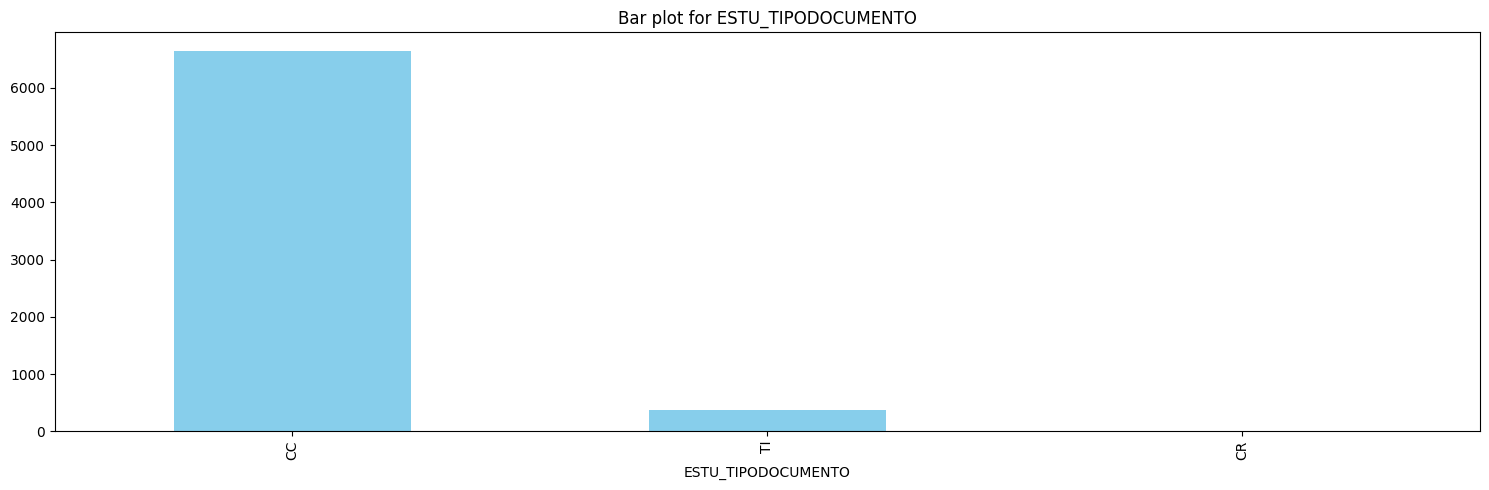

In [8]:
# Supongamos que 'df' es tu DataFrame original después de la limpieza
#df_clean =
df_clean = encoder.reverse_label_encode(df_clean)

# Crear una instancia de la clase de visualización
visualizer = DataVisualization()

# Mostrar descripción de los datos
df_clean_print = df_clean['ESTU_TIPODOCUMENTO'] 

# Visualizar gráficos de barras para características categóricas
# DataVisualization.visualize_numeric(df_clean)
DataVisualization.visualize_categorical(df_clean_print)
